In [20]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn as sns
import pandas as pd
import rubisco_data

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import stats
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter

In [21]:
def RC(konCs, KCs, KOs, CO2_conc, O2_conc):
    denom = (1/KCs) + (1/CO2_conc) + (1/KOs)*(O2_conc/CO2_conc)
    return konCs/denom

def RO(konCs, KCs, KOs, CO2_conc, O2_conc, alpha):
    denom = (1/KOs) + (1/O2_conc) + (1/KCs)*(CO2_conc/O2_conc)
    return alpha*konCs / denom
    
def net_carb(konCs, KCs, KOs, CO2_conc, O2_conc, alpha):
    rc_vals = RC(konCs, KCs, KOs, CO2_conc, O2_conc)
    ro_vals = RO(konCs, KCs, KOs, CO2_conc, O2_conc, alpha)
    return rc_vals - ro_vals

In [28]:
konCs = np.logspace(-2, -0.5, 100)
KCs = np.logspace(0, 3, 100)
KOs = np.logspace(2, 4, 100)

konC_grid, KC_grid = np.meshgrid(konCs, KCs)

single_KO = 500

C = 92.614
alpha = 1/C

CO2_ambient = 15
O2_ambient = 270
CO2_elevated = 500

In [29]:
net_carb_ambient = net_carb(konC_grid, KC_grid, single_KO, CO2_ambient, O2_ambient, alpha)
net_carb_elevated_CO2 = net_carb(konC_grid, KC_grid, single_KO, CO2_elevated, O2_ambient, alpha)

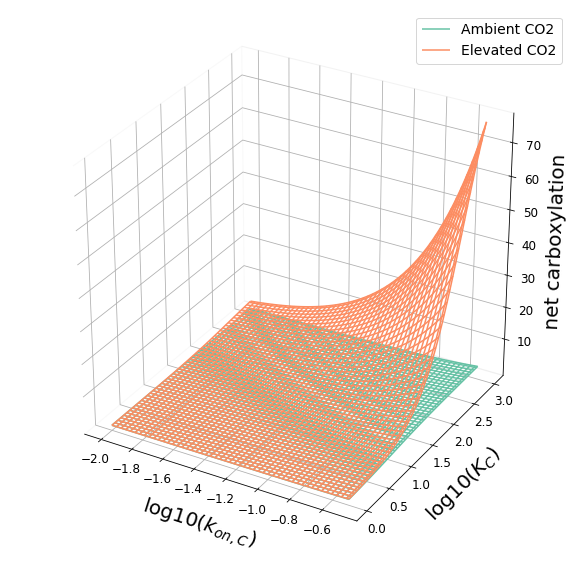

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

pal = sns.color_palette('Set2')

ax.plot_wireframe(np.log10(konC_grid), np.log10(KC_grid), net_carb_ambient, label='Ambient CO2', color=pal[0])
ax.plot_wireframe(np.log10(konC_grid), np.log10(KC_grid), net_carb_elevated_CO2, label='Elevated CO2', color=pal[1])
    
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xlabel('log10($k_{on,C})$', fontsize=20, labelpad=12)
ax.set_ylabel('log10($K_C$)', fontsize=20, labelpad=12)
ax.set_zlabel('net carboxylation', fontsize=20, labelpad=12)

ax.legend(fontsize=14)

def _logscale(x, pos):
    return '$10^{%d}$' % x
formatter = FuncFormatter(_logscale)
#ax.xaxis.set_major_formatter(formatter)
#ax.yaxis.set_major_formatter(formatter)
#ax.zaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(labelsize=12, pad=2)
ax.yaxis.set_tick_params(labelsize=12, pad=2)
ax.zaxis.set_tick_params(labelsize=12, pad=6)

#ax.tick_params(pad=30)

#ax.set_ylim(-5, 5)
#ax.set_xlim(-5, 5)
#ax.set_zlim(-8, 8)
plt.show()